# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load Titanic Dataset
Publicly available at https://www.kaggle.com/c/titanic/data

pd.read_csv -> provides ability to read csv data as a data frame, user can provide delimiter to be used for splitting each line into separate columns. read_csv uses comma as default delimiter value. In below example since each row has column value separated by comma. 
If delimiter value is tab character then read_csv is used as below: pd.read_csv("pathtoData",sep="\t")

read_csv also provides ability to read csv files from zipped files for which we can specify type of compression used, such as pd.read_csv("pathToData",compression="zip") used when file is zipped. 

In [2]:
df_train = pd.read_csv("./train.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test = pd.read_csv("./test.csv")

In [5]:
df_test = pd.DataFrame()

# Combine Train and test data into one for Exploratory Analysis

Use syntax pd.concat to combine two dataframes into one

In [102]:
df_titanic = pd.concat([df_train,df_test])
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Check Data

In [103]:
datadict = pd.DataFrame(df_titanic.dtypes)
datadict

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [104]:
datadict['MissingVal'] = df_titanic.isnull().sum()
datadict

,0,MissingVal
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [105]:
datadict['NUnique']=df_titanic.nunique()
datadict

,0,MissingVal,NUnique
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [106]:
datadict['Count']=df_titanic.count()
datadict

,0,MissingVal,NUnique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [107]:
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [108]:
# get discripte statistcs on "object" datatypes
df_titanic.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [109]:
# get discriptive statistcs on "number" datatypes
df_titanic.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Size of Data set

In [110]:
print("""# of Rows in each Dataframe:""")
pd.DataFrame([["Train.csv",len(df_train)],
              ["Test.csv",len(df_test)],
              ["Combined",len(df_titanic)]],
             columns=["DataSet","Size"])

# of Rows in each Dataframe:


,DataSet,Size
0,Train.csv,891
1,Test.csv,0
2,Combined,891


<AxesSubplot:xlabel='Age', ylabel='Density'>

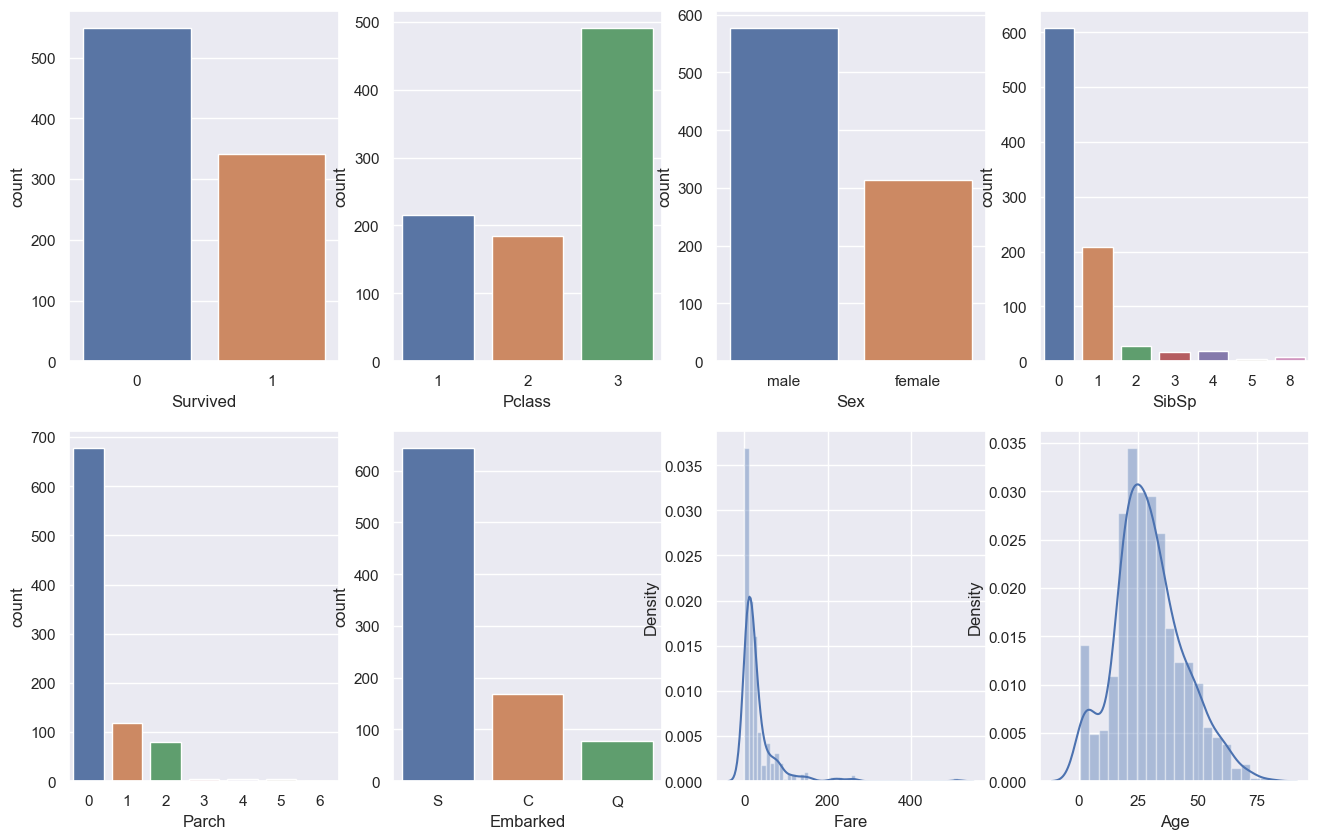

In [111]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=df_titanic,ax=axes[0,0])
sns.countplot('Pclass',data=df_titanic,ax=axes[0,1])
sns.countplot('Sex',data=df_titanic,ax=axes[0,2])
sns.countplot('SibSp',data=df_titanic,ax=axes[0,3])
sns.countplot('Parch',data=df_titanic,ax=axes[1,0])
sns.countplot('Embarked',data=df_titanic,ax=axes[1,1])
sns.distplot(df_titanic['Fare'], kde=True,ax=axes[1,2])
sns.distplot(df_titanic['Age'].dropna(),kde=True,ax=axes[1,3])

# Observations from above univariate charts

1. Higher number of males are onboard
2. Based on Fare and PClass, its clear that more no of passengers had PClass 3 tickers which maybe lowest fare on the ship
3. Survivor percentage is 38.4% 

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

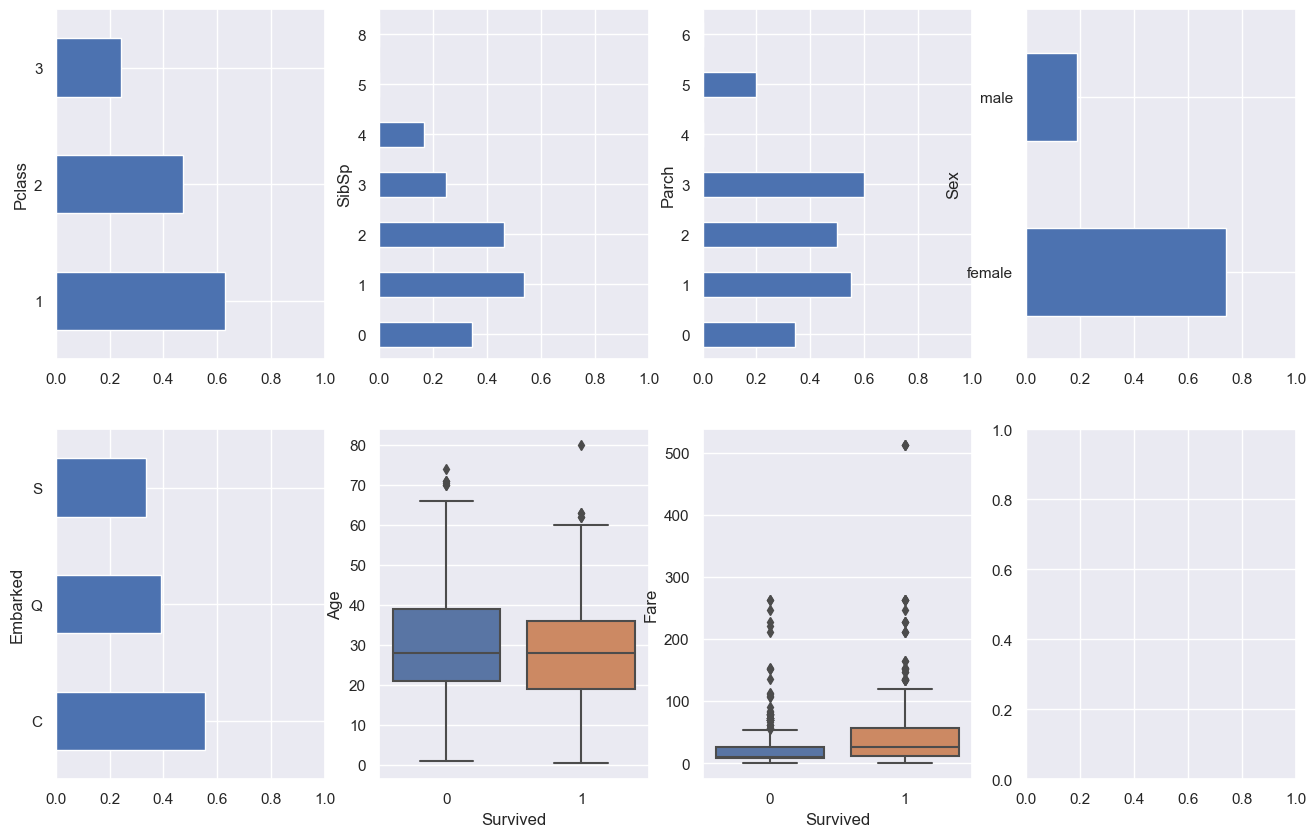

In [115]:
## More on bivariate
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
df_titanic.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
df_titanic.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
df_titanic.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
df_titanic.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
df_titanic.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=df_titanic,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=df_titanic,ax=axesbi[1,2])

# Observations from above bivariate plots

1. Survivorship based on gender has a strong relationship. Survivors among male is approx. 20% and 75% among females. 
2. Based on PClass and survivor bar plot, Passengers with PClass1 tickets had higher percentage of surviving. 

# Survivor Stats

## Percentage Survivors

Only 38.4% percent survived of total 891 passengers in train dataset onboard Titanic ship. 

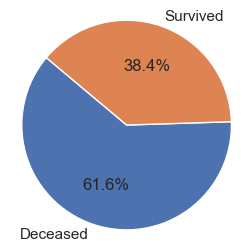

,Survived,PassengerCount,Survived_orig
0,Deceased,549,0
1,Survived,342,1


In [112]:
tmp = pd.DataFrame(df_titanic[~df_titanic["Survived"].isnull()].groupby("Survived").size(),columns=["PassengerCount"]).reset_index()
tmp["Survived_orig"] = tmp["Survived"] 
tmp["Survived"] = tmp["Survived_orig"].apply(lambda x : "Survived" if x==1 else "Deceased")
# Plot the pie chart using seaborn
plt.figure(figsize=(3, 3))
plt.pie(tmp['PassengerCount'], labels=tmp['Survived'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()
tmp

## Survivors based on Gender

Observation: 
1. Around 81.1% out of total 577 males were deceased in titanic disaster, compared to only 25.8% females were deceased out of total 314.
2. More number of males were onboard the titanic ship

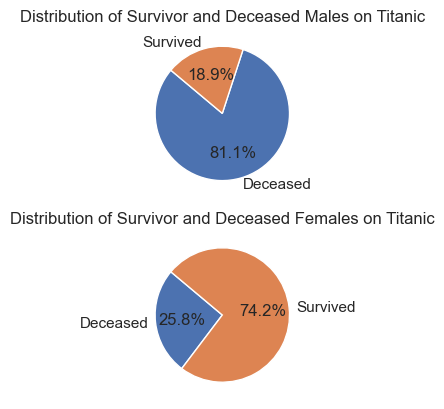

,Survived,Sex,PassengerCount,Survived_orig
0,Deceased,female,81,0
1,Deceased,male,468,0
2,Survived,female,233,1
3,Survived,male,109,1


In [113]:
tmp = pd.DataFrame(df_titanic[~df_titanic["Survived"].isnull()].groupby(["Survived","Sex"]).size(),columns=["PassengerCount"]).reset_index()
tmp["Survived_orig"] = tmp["Survived"] 
tmp["Survived"] = tmp["Survived_orig"].apply(lambda x : "Survived" if x==1 else "Deceased")
# Plot the pie chart using seaborn


# Set up the subplots
fig, axs = plt.subplots(2, 1)

ax = axs[0] 
ax.pie(tmp[tmp["Sex"]=="male"]["PassengerCount"], labels=tmp[tmp["Sex"]=="male"]['Survived'], autopct='%1.1f%%', startangle=140)
ax.set_aspect('equal')
ax.set_title(f'Distribution of Survivor and Deceased Males on Titanic')

ax = axs[1] 
ax.pie(tmp[tmp["Sex"]=="female"]["PassengerCount"], labels=tmp[tmp["Sex"]=="female"]['Survived'], autopct='%1.1f%%', startangle=140)
ax.set_aspect('equal')
ax.set_title(f'Distribution of Survivor and Deceased Females on Titanic')

plt.show()
tmp

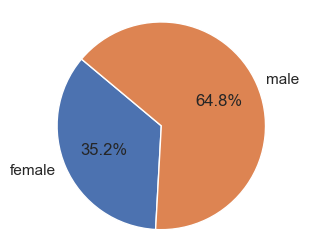

,Sex,PassengerCount,PassengerCountPercentage
0,female,314,35.24
1,male,577,64.76


In [114]:
tmp = pd.DataFrame(df_titanic[~df_titanic["Survived"].isnull()].groupby("Sex").size(),columns=["PassengerCount"]).reset_index()
# Calculate Percentage
tmp['PassengerCountPercentage'] = (tmp['PassengerCount'] / tmp['PassengerCount'].sum()) * 100
tmp['PassengerCountPercentage'] = tmp['PassengerCountPercentage'].apply(lambda x : np.round(x,decimals=2))

plt.figure(figsize=(3, 3))
plt.pie(tmp['PassengerCount'], labels=tmp['Sex'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()
tmp

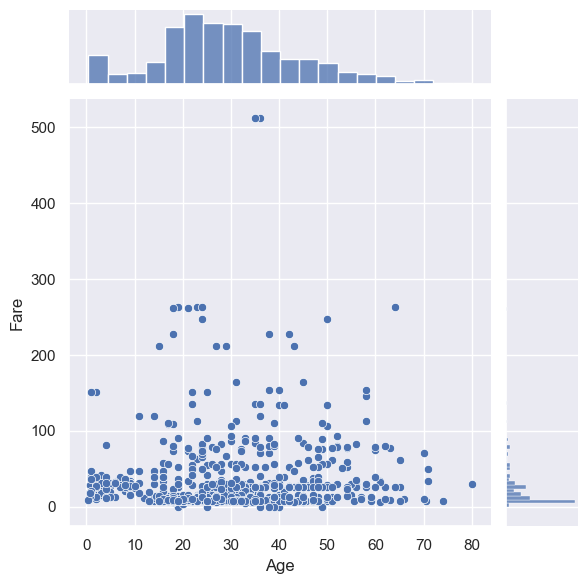

In [116]:
sns.jointplot(x="Age", y="Fare", data=df_titanic);

# Generate Correlation matrix, Multivariate analysis

<AxesSubplot:>

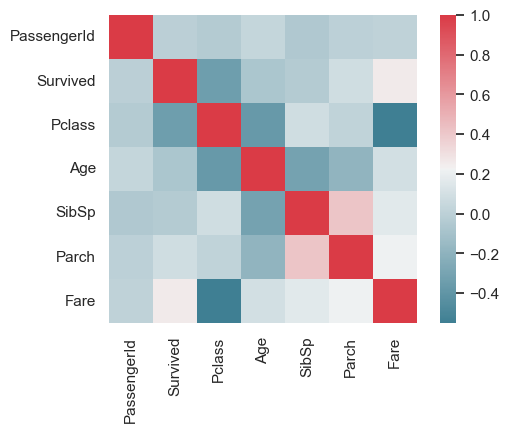

In [119]:
import seaborn as sns

f, ax = plt.subplots(figsize=(6, 4))
corr = df_titanic.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Obverstation on above correlation matrix of multivariate study.
1. Above correlation matrix shows positive correlation between Fare and Survivor
2. Correlation matrix shows negative correlation between 
    PClass and Fare, 
    also with Age and PClass

# Feature Engineering Data- Extract title from name, Extract new features from the other features

In [122]:
df_titanic['Name_len']=df_titanic.Name.str.len()

In [128]:
df_titanic['Ticket_First']=df_titanic.Ticket.str[0]

In [130]:
df_titanic['FamilyCount']=df_titanic.SibSp+df_titanic.Parch


In [131]:
df_titanic['Cabin_First']=df_titanic.Cabin.str[0]


In [132]:
df_titanic['title'] = df_titanic.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)


In [133]:
df_titanic.title.value_counts().reset_index()


,index,title
0,Mr.,517
1,Miss.,182
2,Mrs.,125
3,Master.,40
4,Dr.,7
5,Rev.,6
6,Major.,2
7,Mlle.,2
8,Col.,2
9,Don.,1


# data for statistical modeling

In [150]:
# we see that there are 15 Zero values and its reasonbale 
# to flag them as missing values since every ticket 
# should have a value greater than 0
print((df_titanic.Fare == 0).sum())

15


In [151]:
# mark zero values as missing or NaN
df_titanic.Fare = df_titanic.Fare.replace(0, np.NaN)

In [152]:
# validate to see if there are no more zero values
print((df_titanic.Fare == 0).sum())

0


In [153]:
# keep the index
df_titanic[df_titanic.Fare.isnull()].index

Int64Index([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
            815, 822],
           dtype='int64')

In [154]:
df_titanic.Fare.mean()

32.75564988584471

In [155]:
# impute the missing Fare values with the mean Fare value
df_titanic.Fare.fillna(df_titanic.Fare.mean(),inplace=True)

In [156]:
# validate if any null values are present after the imputation
df_titanic[df_titanic.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Ticket_First,FamilyCount,Cabin_First,title


In [157]:
# we see that there are 0 Zero values
print((df_titanic.Age == 0).sum())

0


In [158]:
# impute the missing Age values with the mean Fare value
df_titanic.Age.fillna(df_titanic.Age.mean(),inplace=True)

In [159]:
# validate if any null values are present after the imputation
df_titanic[df_titanic.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Ticket_First,FamilyCount,Cabin_First,title


In [160]:
# We see that a majority 77% of the Cabin variable has missing values.
# Hence will drop the column from training a machine learnign algorithem
df_titanic.Cabin.isnull().mean()

0.7710437710437711

In [161]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Name_len      891 non-null    int64  
 13  Ticket_First  891 non-null    object 
 14  FamilyCount   891 non-null    int64  
 15  Cabin_First   204 non-null    object 
 16  title         890 non-null    object 
dtypes: float64(2), int64(7), object(8)
memory usage: 118.5+ KB


# Statistical Modelling

In [162]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_len',
       'Ticket_First', 'FamilyCount', 'Cabin_First', 'title'],
      dtype='object')

In [163]:
trainML = df_titanic[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Name_len', 'Ticket_First', 'FamilyCount',
       'title']]

In [164]:
# drop rows of missing values
trainML = trainML.dropna()

In [165]:
# check the datafram has any missing values
trainML.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Name_len        0
Ticket_First    0
FamilyCount     0
title           0
dtype: int64

# single predictor model with logistic regression

In [166]:
# Import Estimator AND Instantiate estimator class to create an estimator object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [168]:
## regression on Age based survivor prediction

X_Age = trainML[['Age']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Age,y)
# Make a prediction
y_predict = lr.predict(X_Age)
y_predict[:10]
(y == y_predict).mean()

0.6182432432432432

In [173]:
## regression on Fare based survivor prediction
X_Fare = trainML[['Fare']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Fare,y)
# Make a prediction
y_predict = lr.predict(X_Fare)
y_predict[:10]
(y == y_predict).mean()

0.6621621621621622

In [174]:
## regression on Sex based survivor prediction
X_sex = pd.get_dummies(trainML['Sex']).values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_sex, y)
# Make a prediction
y_predict = lr.predict(X_sex)
y_predict[:10]
(y == y_predict).mean()

0.786036036036036

In [175]:
## regression on PClass based survivor prediction

X_pclass = pd.get_dummies(trainML['Pclass']).values
y = trainML['Survived'].values
lr = LogisticRegression()
lr.fit(X_pclass, y)
# Make a prediction
y_predict = lr.predict(X_pclass)
y_predict[:10]
(y == y_predict).mean()

0.6779279279279279

In [177]:
# Predicting Survival based on Random Forest 

from sklearn.ensemble import RandomForestClassifier
X=trainML[['Age', 'SibSp', 'Parch',
       'Fare', 'Name_len', 'FamilyCount']].values # Taking all the numerical values
y = trainML['Survived'].values
RF = RandomForestClassifier()
RF.fit(X, y)
# Make a prediction
y_predict = RF.predict(X)
y_predict[:10]
(y == y_predict).mean()

0.9876126126126126

In [179]:
pd.DataFrame([["LogisticRegression Age",61.8],
             ["LogisticRegression Fare",66.2],
             ["LogisticRegression Sex",78.6],
             ["LogisticRegression PClass",67.7],
             ["RandomForest All Numeric Values",98.7],],columns=["Predictor Type","Accuracy"])

,Predictor Type,Accuracy
0,LogisticRegression Age,61.8
1,LogisticRegression Fare,66.2
2,LogisticRegression Sex,78.6
3,LogisticRegression PClass,67.7
4,RandomForest All Numeric Values,98.7
